In this article we’re going to wal you through the following:

1. What are Decorators

2. How to create & use Decorators

3. Built in Decorators

4. Custom Decorators.
You can download the files from here.

# What are decorators?

A decorator in Python is a function that accepts another function as an argument. The decorator will usually modify or enhance the function it accepted and return the modified function. This means that when you call a decorated function, you will get a function that may be a little different that may have additional features compared with the base definition.
It is a special kind of declaration that can be attached to a class declaration, method, accessor, property, or parameter.

# How to create and use decorators?

1. For creating a decorator, take a simple function that return some message and mention the function call to print the message.Now we want to change this message to uppercaase letter without making any change in the function print_str(). For this we can use decorator.

2. we will define a decorator function with name str_upper and take one parametre as func that is the function reference here because we are applying the decorator on some function right? So, for that here we neeed that paramter of func.

3. Here inside of str_upper define another function and name it as inner(you can take any name).We need the string which we want to change that is present in func parametre now assign that to a variable and change it to uppercase.Now this inner function will return the uppercase message.

4. Since the inner function is returning we need to call the function.We now call the inner function name in the return statement of decorator function .i.e.str_upper

$USAGE$ - @ followed by the decorator function i.e @str_upper on a function which we want to apply the decorator.So, here we call the decorator on top of print_str function.

In [1]:
def str_upper(func):#step 2
    def inner():#step 3
        str1=func()
        return str1.upper()
    return inner#step 4
        
@str_upper
def print_str():#step1
    return "hey there"

print(print_str())#function call

HEY THERE


Confused? I feel you! I have been in your shoes. They can be a little hard to understand at first. Check out this [playlist](https://www.youtube.com/watch?v=60BhDMIm5vk&list=PLzgPDYo_3xukWUakgF-OJvDOChq6drPG2&ab_channel=Amulya%27sAcademy) which provide a detailed explanation on decorators.


# Built-In Decorators

Python comes with several built-in decorators. The big three are:

@staticmethod
The staticmethod decorator modifies a method function so that it does not use the self variable. The method function will not have access to a specific instance of the class.

@classmethod
The classmethod decorator modifies a method function so that it receives the class object as the first parameter instead of an instance of the class. This method function wil have access to the class object itself.

@property
It is a built-in function that creates and returns a property object.

You can checkout other built-in decorators [here](https://towardsdatascience.com/10-fabulous-python-decorators-ab674a732871).

# Custom Decorators
Up until this moment we’ve seen what decorators are, how to use the decorators.

Here on we’ll discuss some custom decorators. They will also give a wider picture on decorators.

Let's begin with importing our decorator package

In [2]:
from deco import * #importing the custom decorators

## Number 1: Regression Metrics       	
A common question by beginners to regression predictive modeling projects is-How do I calculate accuracy for my regression model?
Accuracy (e.g., classification accuracy) is a measure for classification, not regression.
A regression model must be reported as an error in those predictions.
Now which error metrics should be  considered for the performance of the regression model, this is where our regression metrics decorator comes into picture.


$USAGE$-

Start by writing a function that takes the actual and predicted values as paramter and apply the reg_met decorator on the function which will give you the popular regression metrics. You can also cutomize the output by passing the neccessary parameters accordingly.
We have listed all the available parameters that can be used to cutomize the output.

In [3]:
print(reg_met.__doc__)

{y_actual = None,y_predict = None, mse = True, mae = True, rmse = True, r_square = True, sample_weight = None,  multioutput = uniform_average, squared = True}


In [4]:
y_actual = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_predict =[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

In [5]:
@reg_met#calling the decorator
def findmet():
    return; #created function to appply decorator
findmet(y_actual = y_actual,y_predict = y_predict)#call the function to see the output

,Metrics,Score
0,MSE,0.350000
1,MAE,0.500000
2,RMSE,0.591608
3,R square,0.000000


Moving on, we have
## Number 2 –  Classification Metrics
Yay!! So you have successfully built your classification model. What should you do now?  How do you evaluate the performance of the model? That is how good the model is in predicting the outcome. If we search online we can get a lot of answers for this question. But what if you can get all the famous classification metrics in one go?
There comes our  classification metrics decorator that will not only provide the boring tabular metrics but, gives you a good visualization too.


$USAGE$-
For this all you need to do is create a function by passing the neccessary arguments(i.e, y_actual=y_test, y_predict=y_predict) and optional arguments accordingly for your desired output, although if you won't provide the optional agruments it takes the default values.. If precision-recall and ROC curve are required you must provide the classifier in the agruments. If you wish to skip some metrics you can make the argument of a specific metrics False.

Since in the sklearn confusion_matrix and classification_report module almost all the parameters are common so to differentiate between them we have added cr_ for classification report parameters and cm_ for confusion matrix parameters. We have listed all the parameters and their default values below.

In [6]:
print(classification_met.__doc__)

{y_actual = None, y_predict=None, classifier = None, y_prob = None, accuracy_score = True,confusion_matrix = True, 
        classification_report  = True, confusionmatrixplot  = True, a_normalize = True, a_sample_weight = None,
        cr_labels = None, cr_target_names = None, cr_sample_weight = None, digits = 2, output_dict = False,
        zero_division = 'warn', cm_labels = None, cm_sample_weight = None, normalize = None,data = None, display_labels = None,
        average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None} 


In [7]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
y_predict = classifier.predict(X_test)

Accuracy Score:  0.76
----------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.75      0.81      0.78        26

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50

----------------------------------------------------------
Confusion Matrix:
 [[17  7]
 [ 5 21]]
----------------------------------------------------------


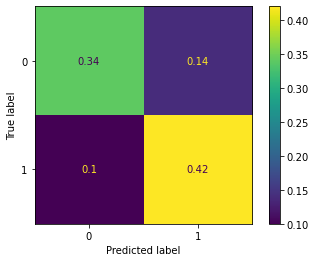

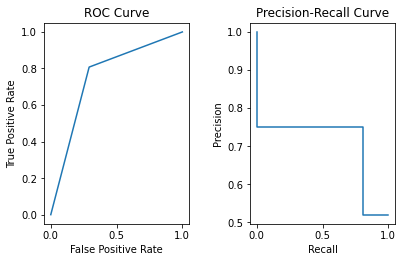

roc_auc_score:  0.7580128205128205


In [8]:
@classification_met
def classi(y_actual=y_test, y_predict=y_predict): #created function to appply decorator
    return;
#add parametres as required by specifying them while calling the function
classi(y_actual=y_test, y_predict=y_predict, classifier = classifier, accuracy_score = True,
       confusion_matrix = True,classification_report = True, confusionmatrixplot = True)

## Number 3 - descriptive_statistics
Now whenever we read data we use the same lines of code to understand what’s present in the data before moving into training the data. So, why  repeat ourselves for each dataset,  in such cases the descriptive statistics decorator comes handy by giving you the brief insights of the dataset you will be working on.

$USAGE$-
Write a function that return data for which you want the statistics and asusual apply the decorator, on top of it also don't forget to call the function to see the output. Since most of the parameters of sklearn mean, median and mode, So inorder to accesss them add the prefix mean_ , median_ and mode_ accordingly with the parameters. All the available parameters are listed below.

In [9]:
print(descriptive_statistics.__doc__)

{describe = True, info = True, statistics = True, null_count = True, memory_usage = True, value_counts= True,
            corelation = True, datasparsity_plot = True, value_co='all', percentiles=None, include=None, exclude=None, 
            datetime_is_numeric=False,verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None, 
            null_counts=None,normalize=False, sort=True, ascending=False, bins=None, dropna=True,
            method=pearson, min_periods=1, index=True, deep=False,
            mean_axis=None, mean_skipna=None, mean_level=None, mean_numeric_only=None,
            median_axis=None, median_skipna=None, median_level=None, median_numeric_only=None,
            mode_axis=0, mode_numeric_only=False, mode_dropna=True}


In [10]:
@descriptive_statistics
def stats(**kwargs):
    import pandas as pd
    data = pd.read_csv('sample.csv')
    data.head()
    data.drop(data.iloc[:, 0:15], inplace = True, axis = 1)
    return data;

In [11]:
import pandas as pd
data = pd.read_csv('sample.csv')
data.head()
data.drop(data.iloc[:, 0:15], inplace = True, axis = 1)
data.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Upper-HeatT-3   300 non-null    float64
 1   ChipMass-4      300 non-null    float64
 2   WeakLiquorF     300 non-null    float64
 3   BlackFlow-2     300 non-null    float64
 4   WeakWashF       300 non-null    float64
 5   SteamHeatF-3    300 non-null    float64
 6   T-Top-Chips-4   300 non-null    float64
 7   SulphidityL-4   160 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


Describe:



,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,160.000000
mean,300.381743,162.120610,875.491563,1170.387177,266.104633,49.664537,251.229687,30.463594
std,4.647201,14.129462,123.182165,149.288972,163.222997,4.589876,1.293151,0.671066
min,293.312000,113.922000,486.938000,838.948000,0.000000,35.510000,248.359000,29.010000
25%,296.418250,153.089750,791.096750,1038.338500,141.560000,46.378500,250.298250,30.107500
50%,298.493000,163.601000,869.552000,1144.513500,280.451500,50.192500,251.357500,30.395000
75%,304.228250,172.286750,969.904000,1318.632750,405.887750,53.284750,252.332250,30.838250
max,311.146000,189.268000,1226.277000,1395.767000,715.715000,63.332000,254.122000,32.840000


----------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Upper-HeatT-3   300 non-null    float64
 1   ChipMass-4      300 non-null    float64
 2   WeakLiquorF     300 non-null    float64
 3   BlackFlow-2     300 non-null    float64
 4   WeakWashF       300 non-null    float64
 5   SteamHeatF-3    300 non-null    float64
 6   T-Top-Chips-4   300 non-null    float64
 7   SulphidityL-4   160 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


None

----------------------------------------------------------
Memory Usage:



Index              128
Upper-HeatT-3     2408
ChipMass-4        2408
WeakLiquorF       2408
BlackFlow-2       2408
WeakWashF         2408
SteamHeatF-3      2408
T-Top-Chips-4     2408
SulphidityL-4     2408
dtype: int64

----------------------------------------------------------
Null Counts:



Upper-HeatT-3       1
ChipMass-4          1
WeakLiquorF         1
BlackFlow-2         1
WeakWashF           1
SteamHeatF-3        1
T-Top-Chips-4       1
SulphidityL-4     141
dtype: int64

----------------------------------------------------------
----------------------------------------------------------
Corelation: 



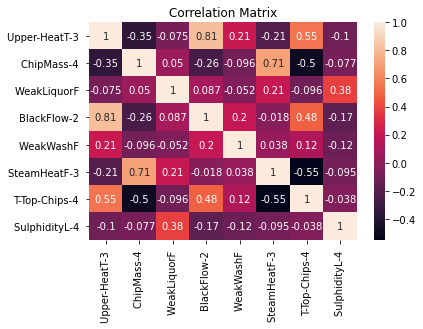

----------------------------------------------------------
STATISTICS:

Mean: 



Upper-HeatT-3      300.381743
ChipMass-4         162.120610
WeakLiquorF        875.491563
BlackFlow-2       1170.387177
WeakWashF          266.104633
SteamHeatF-3        49.664537
T-Top-Chips-4      251.229687
SulphidityL-4       30.463594
dtype: float64

----------------------------------------------------------
Median: 



Upper-HeatT-3      298.4930
ChipMass-4         163.6010
WeakLiquorF        869.5520
BlackFlow-2       1144.5135
WeakWashF          280.4515
SteamHeatF-3        50.1925
T-Top-Chips-4      251.3575
SulphidityL-4       30.3950
dtype: float64

----------------------------------------------------------
Mode: 



,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,295.551,174.069,858.439,995.302,0.0,46.053,250.032,30.21
1,303.624,NaN,863.677,1144.876,NaN,53.362,NaN,NaN
2,NaN,NaN,909.810,1319.664,NaN,NaN,NaN,NaN
3,NaN,NaN,949.280,1319.788,NaN,NaN,NaN,NaN
4,NaN,NaN,1004.109,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------


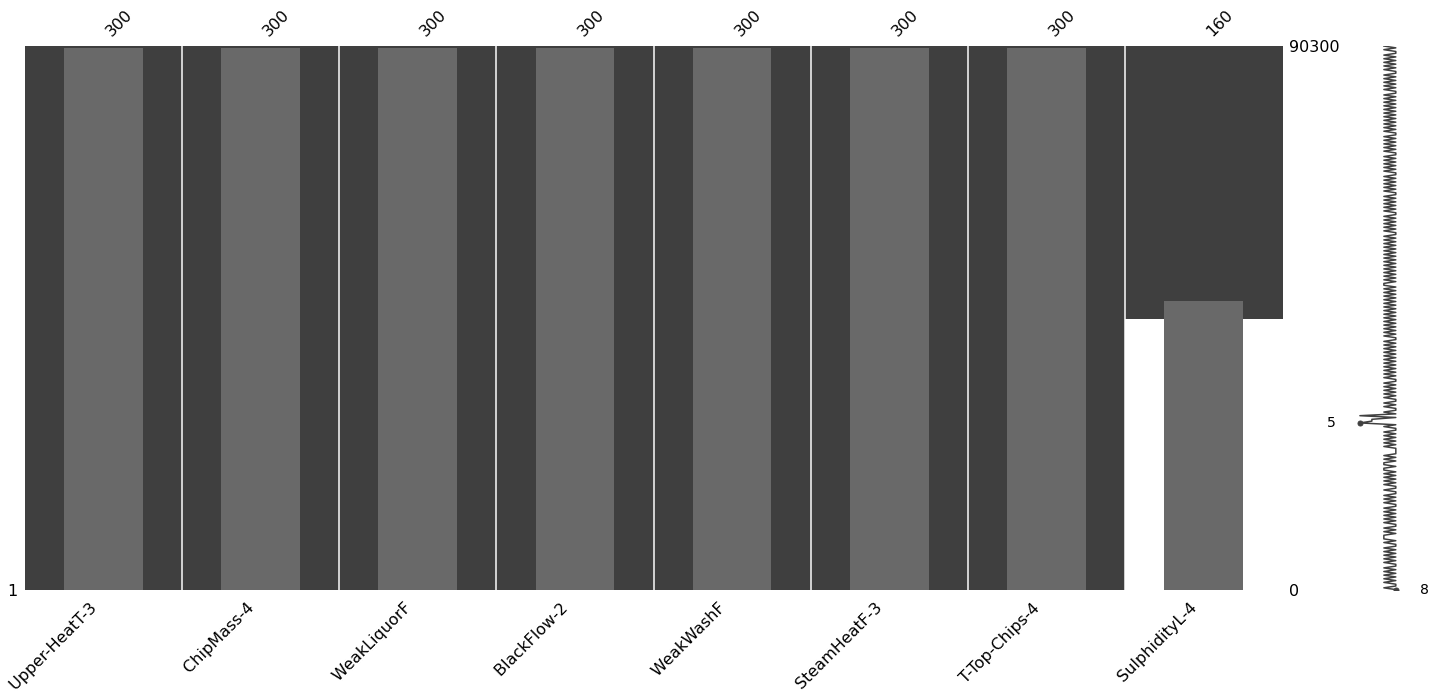

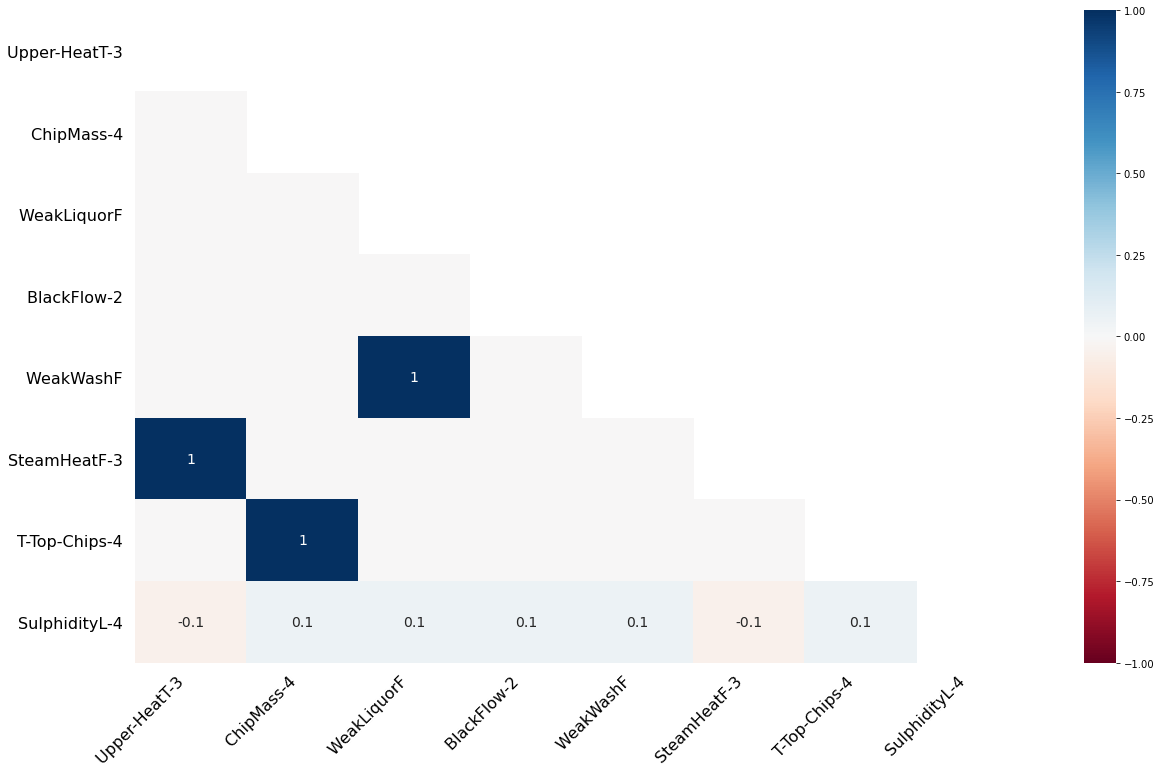

In [12]:
stats(describe = True, info = True, statistics = True,
      null_count = True, memory_usage = True, value_counts= True,
      corelation = True, datasparsity_plot = True)

## Number 4 - text_cleaning
This is so far an incredible decorator, as the name suggests it cleans the text data by removing unwanted characters(like emoji’s etc..),punctuations and stop words, and can also perform technique like stemming and lemmatization.

$USAGE$-


Write a function that returns the data column on which the text cleaning has to be performed, then apply the decorator followed by function call to see the cleaned text. If you wish not to do perform a specific cleaning or word embedding technique you can skip it by setting that particular agrument to False. List of available parameters is given below.


In [13]:
print(text_cleaning.__doc__)     

{clean_stopwords = False, clean_punc = False, clean_unwanted_char = False, 
                  to_lowercase = False, Stemming = False, lemmatization = False, return_sent= False}


In [14]:
@text_cleaning
def text(filename,**kwargs):
    import pandas as pd
    df = pd.read_csv(filename, sep='\t', names=['label', 'message'])
    return df['message']

In [15]:
text('SMSSpamCollection', return_sent=True,lemmatization=True)

,text_cleaning
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he go to usf, he life around..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * wa in mood for that. So...any other su..."
5570,The guy did some bitching but I acted like i'd...


This brings us to the end of the article and we hope this article was helpful in understanding $DECORATORS$. Be sure to drop your feedback and suggestions below.
Thank You for reading!
